### 2. Assessment tasks
You will analyse the UNDP Peoples’ Climate Vote 2024 dataset, which covers 73 countries and records 
responses by age, education, and country. It includes public attitudes towards climate change, the energy 
transition, and institutional responsibility.


You can download the dataset here: https://peoplesclimate.vote/data-center


Your tasks for the Coursework Part I are as follows:
a) Exploratory data analysis (16 marks) 
- Investigate whether there is a consistent age gap across countries in how urgently people want to replace 
coal, oil, and gas with renewable energy.
- Provide descriptive statistics and visualisations (heatmaps, grouped bar charts).
- Identify countries with the largest and smallest age gaps.


Conclusions (2 marks)
- Summarise key findings: global age gap

### 3. General guidance and study support
- Handle preprocessing carefully (e.g., “All Education” / “All Ages” aggregates).
- Justify your choice of visualisation and modelling approaches.
- Clearly explain your evaluation metrics.


Links: Module Handbook, Skills@Library, and Minerva resources.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_excel('Peoples_Climate_Vote_Database_2024.xlsx')

print("Dataset loaded successfully!")
print(f"Total rows: {len(df)}")
print(f"Total countries: {df['Country'].nunique()}")


Dataset loaded successfully!
Total rows: 45784
Total countries: 73


In [44]:
df.head(10)

,Column1,ID,CID,QID,RID,EID,AID,Country,Question Text,Question Text (Short),Response,Education,Age,Weighted Mean,Cat ID,Category,Question Context
0,60,60,1,13,1,1,1,Global,Should countries work together on climate chan...,Countries working together,Yes - they should work together despite their ...,All Education,All Ages,86.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
1,61,61,1,13,2,1,1,Global,Should countries work together on climate chan...,Countries working together,No - they should work separately,All Education,All Ages,7.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
2,62,62,1,13,3,1,1,Global,Should countries work together on climate chan...,Countries working together,It doesn't matter - no country should work on ...,All Education,All Ages,5.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
3,63,63,1,13,1000,1,1,Global,Should countries work together on climate chan...,Countries working together,Don't know,All Education,All Ages,2.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
4,273,273,1,13,1,1,2,Global,Should countries work together on climate chan...,Countries working together,Yes - they should work together despite their ...,All Education,Under 18,86.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
5,274,274,1,13,2,1,2,Global,Should countries work together on climate chan...,Countries working together,No - they should work separately,All Education,Under 18,6.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
6,275,275,1,13,3,1,2,Global,Should countries work together on climate chan...,Countries working together,It doesn't matter - no country should work on ...,All Education,Under 18,4.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
7,276,276,1,13,1000,1,2,Global,Should countries work together on climate chan...,Countries working together,Don't know,All Education,Under 18,1.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
8,344,344,1,13,1,1,3,Global,Should countries work together on climate chan...,Countries working together,Yes - they should work together despite their ...,All Education,18 to 35,86.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...
9,345,345,1,13,2,1,3,Global,Should countries work together on climate chan...,Countries working together,No - they should work separately,All Education,18 to 35,7.0,4,Peoples' call for collaboration,Climate change is a global problem that requir...


In [45]:
renewable_df = df[df['Question Text (Short)'] == 'Renewable energy transition'].copy()

print(f"\nRenewable energy data: {len(renewable_df)} rows")



Renewable energy data: 3225 rows


In [49]:
# 2. DATA CLEANING - Remove aggregates
# ============================================================================

# Remove "All Ages" and "Global" as these are aggregates, not actual responses
renewable_clean = renewable_df[
    (renewable_df['Age'] != 'All Ages') & 
    (renewable_df['Country'] != 'Global')
].copy()

print(f"After removing aggregates: {len(renewable_clean)} rows")
print(f"Countries in analysis: {renewable_clean['Country'].nunique()}")
print(f"Age groups: {renewable_clean['Age'].unique()}")

#

After removing aggregates: 1435 rows
Countries in analysis: 72
Age groups: ['Under 18' '18 to 35' '36 to 59' '60 plus']


In [51]:
# 3. CALCULATE URGENCY SCORES
# ============================================================================

# We'll focus on "Very quickly" response as measure of urgency
# Calculate percentage wanting "Very quickly" by country and age group

urgency_data = renewable_clean[renewable_clean['Response'] == 'Very quickly'].copy()

# Pivot to get urgency by country and age
urgency_pivot = urgency_data.pivot_table(
    values='Weighted Mean',
    index='Country',
    columns='Age',
    aggfunc='first'
)

print("\nUrgency scores (% wanting 'Very quickly') by age group:")
print(urgency_pivot.head())
print(f"\nAvailable age groups in data: {urgency_pivot.columns.tolist()}")



Urgency scores (% wanting 'Very quickly') by age group:
Age          18 to 35  36 to 59  60 plus
Country                                 
Afghanistan      39.0      31.0      NaN
Algeria          49.0      52.0      NaN
Argentina        24.0      28.0     24.0
Australia        42.0      43.0     40.0
Bangladesh       56.0      54.0      NaN

Available age groups in data: ['18 to 35', '36 to 59', '60 plus']


In [53]:
# 4. CALCULATE AGE GAPS - CRITICAL SECTION
# ============================================================================

# Check which age columns actually exist
available_ages = urgency_pivot.columns.tolist()

# We need at least '18 to 35' and '60 plus' for the main analysis
if '18 to 35' in available_ages and '60 plus' in available_ages:
    urgency_pivot['Age_Gap'] = urgency_pivot['18 to 35'] - urgency_pivot['60 plus']
    print("\n✓ Main age gap calculated (18-35 vs 60+)")
else:
    print("ERROR: Required age groups not found!")
    print(f"Available: {available_ages}")

# Optional: Calculate gap with Under 18 if it exists
if 'Under 18' in available_ages and '60 plus' in available_ages:
    urgency_pivot['Youth_Gap'] = urgency_pivot['Under 18'] - urgency_pivot['60 plus']
    print("✓ Youth gap calculated (Under 18 vs 60+)")
else:
    print("Note: 'Under 18' data not available for all countries")

# Sort by age gap
urgency_pivot_sorted = urgency_pivot.sort_values('Age_Gap', ascending=False)

print("\n" + "="*70)
print("AGE GAP ANALYSIS (18-35 vs 60+)")
print("="*70)
print("\nTop 10 Countries with LARGEST age gaps (young more urgent):")
print(urgency_pivot_sorted[['18 to 35', '60 plus', 'Age_Gap']].head(10))

print("\nTop 10 Countries with SMALLEST age gaps (similar urgency):")
print(urgency_pivot_sorted[['18 to 35', '60 plus', 'Age_Gap']].tail(10))



✓ Main age gap calculated (18-35 vs 60+)
Note: 'Under 18' data not available for all countries

AGE GAP ANALYSIS (18-35 vs 60+)

Top 10 Countries with LARGEST age gaps (young more urgent):
Age                                                 18 to 35  60 plus  Age_Gap
Country                                                                       
United Kingdom of Great Britain and Northern Ir...      43.0     26.0     17.0
United States of America (the)                          38.0     28.0     10.0
Colombia                                                29.0     20.0      9.0
Romania                                                 41.0     35.0      6.0
Russian Federation (the)                                10.0      4.0      6.0
Australia                                               42.0     40.0      2.0
France                                                  32.0     31.0      1.0
Guatemala                                               22.0     21.0      1.0
Argentina           

In [55]:
# 5. DESCRIPTIVE STATISTICS
# ============================================================================

print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS")
print("="*70)

# Overall statistics by age group - only for columns that exist
print("\nMean urgency (% wanting 'Very quickly') by age group:")
for age in available_ages:
    if age in urgency_pivot.columns and age != 'Age_Gap' and age != 'Youth_Gap':
        mean_val = urgency_pivot[age].mean()
        std_val = urgency_pivot[age].std()
        min_val = urgency_pivot[age].min()
        max_val = urgency_pivot[age].max()
        print(f"{age:15} - Mean: {mean_val:.1f}%, Std: {std_val:.1f}%, Range: {min_val:.1f}-{max_val:.1f}%")

print(f"\nAge Gap Statistics (18-35 vs 60+):")
print(f"  Mean age gap: {urgency_pivot['Age_Gap'].mean():.1f} percentage points")
print(f"  Median age gap: {urgency_pivot['Age_Gap'].median():.1f} percentage points")
print(f"  Std deviation: {urgency_pivot['Age_Gap'].std():.1f}")
print(f"  Min gap: {urgency_pivot['Age_Gap'].min():.1f} ({urgency_pivot['Age_Gap'].idxmin()})")
print(f"  Max gap: {urgency_pivot['Age_Gap'].max():.1f} ({urgency_pivot['Age_Gap'].idxmax()})")

# Count countries with positive vs negative gap
positive_gap = (urgency_pivot['Age_Gap'] > 0).sum()
negative_gap = (urgency_pivot['Age_Gap'] < 0).sum()
zero_gap = (urgency_pivot['Age_Gap'] == 0).sum()
print(f"\n  Countries where young MORE urgent (positive gap): {positive_gap}")
print(f"  Countries where old MORE urgent (negative gap): {negative_gap}")
print(f"  Countries with NO gap: {zero_gap}")



DESCRIPTIVE STATISTICS

Mean urgency (% wanting 'Very quickly') by age group:
18 to 35        - Mean: 41.1%, Std: 16.5%, Range: 10.0-79.0%
36 to 59        - Mean: 42.2%, Std: 17.1%, Range: 10.0-80.0%
60 plus         - Mean: 30.5%, Std: 11.0%, Range: 4.0-53.0%

Age Gap Statistics (18-35 vs 60+):
  Mean age gap: 1.9 percentage points
  Median age gap: 1.0 percentage points
  Std deviation: 6.6
  Min gap: -6.0 (Spain)
  Max gap: 17.0 (United Kingdom of Great Britain and Northern Ireland (the))

  Countries where young MORE urgent (positive gap): 8
  Countries where old MORE urgent (negative gap): 5
  Countries with NO gap: 2


In [57]:
# 6. VISUALIZATION 1: HEATMAP
# ============================================================================

print("\nGenerating visualizations...")


Generating visualizations...


✓ Heatmap saved as 'heatmap_age_urgency.png'


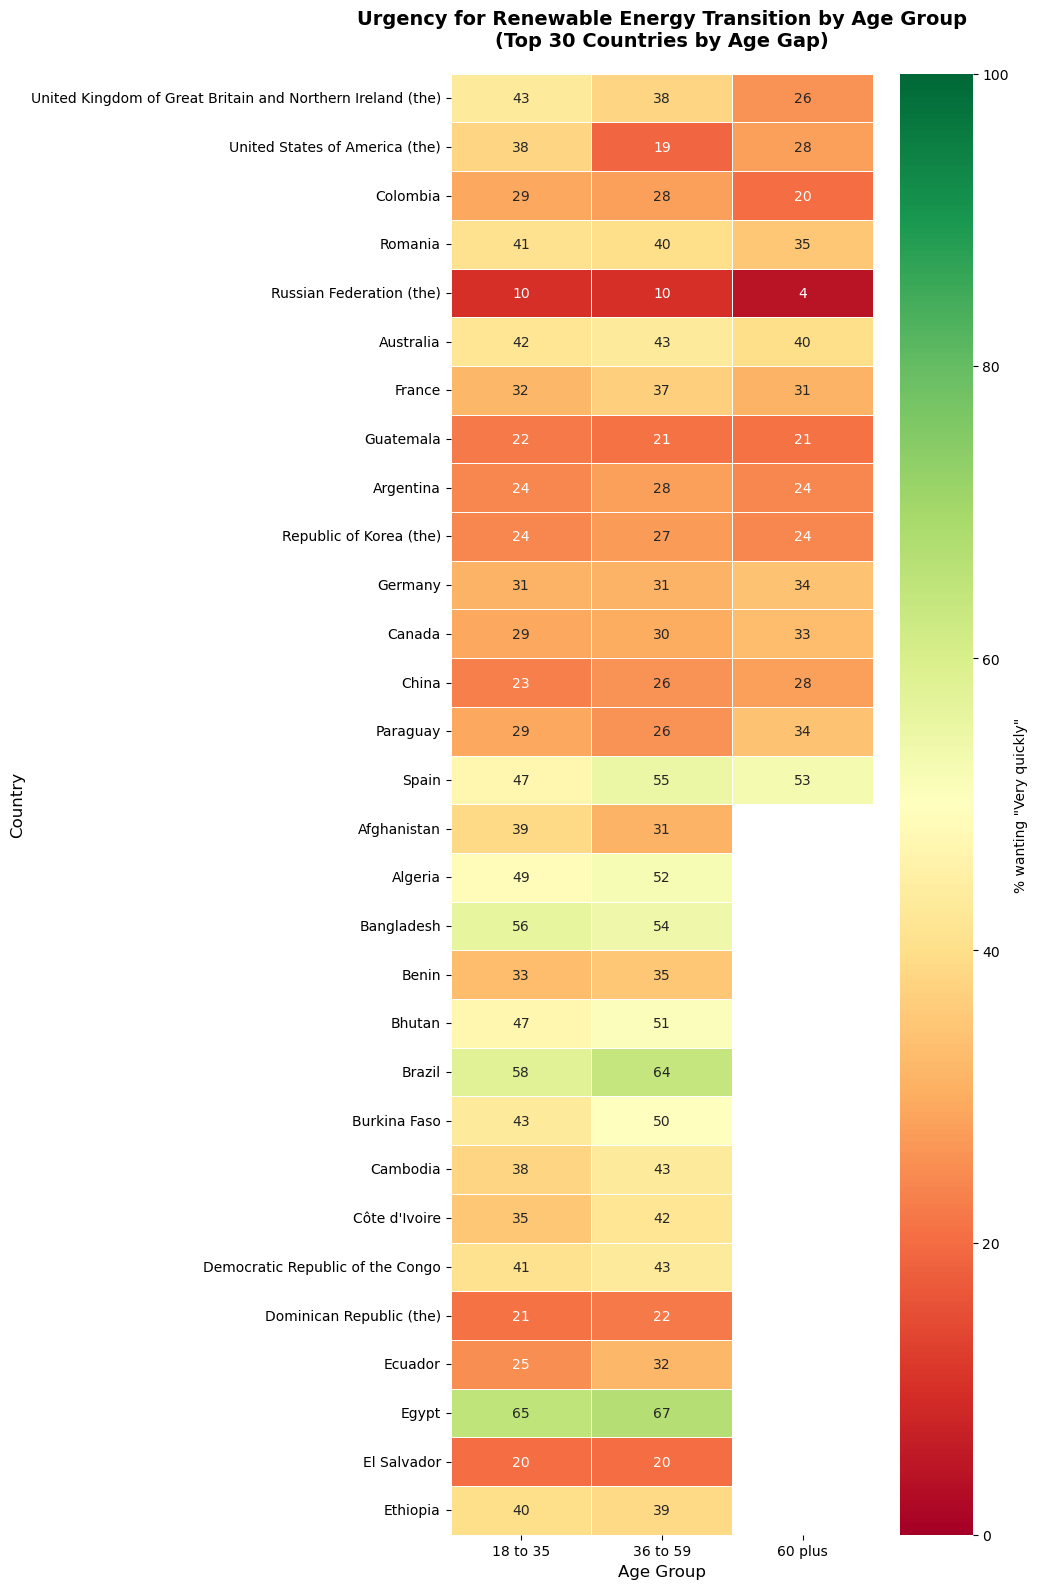

In [59]:
# Prepare data for heatmap - only use age columns that exist (exclude gaps)
age_columns = [col for col in available_ages if col not in ['Age_Gap', 'Youth_Gap']]

# Top 30 countries by age gap
top_countries = urgency_pivot_sorted.head(30).index
heatmap_data = urgency_pivot.loc[top_countries, age_columns]

plt.figure(figsize=(10, 16))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn', 
            cbar_kws={'label': '% wanting "Very quickly"'},
            linewidths=0.5, vmin=0, vmax=100)
plt.title('Urgency for Renewable Energy Transition by Age Group\n(Top 30 Countries by Age Gap)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_age_urgency.png', dpi=300, bbox_inches='tight')
print("✓ Heatmap saved as 'heatmap_age_urgency.png'")
plt.show()

✓ Bar chart saved as 'bar_chart_top15.png'


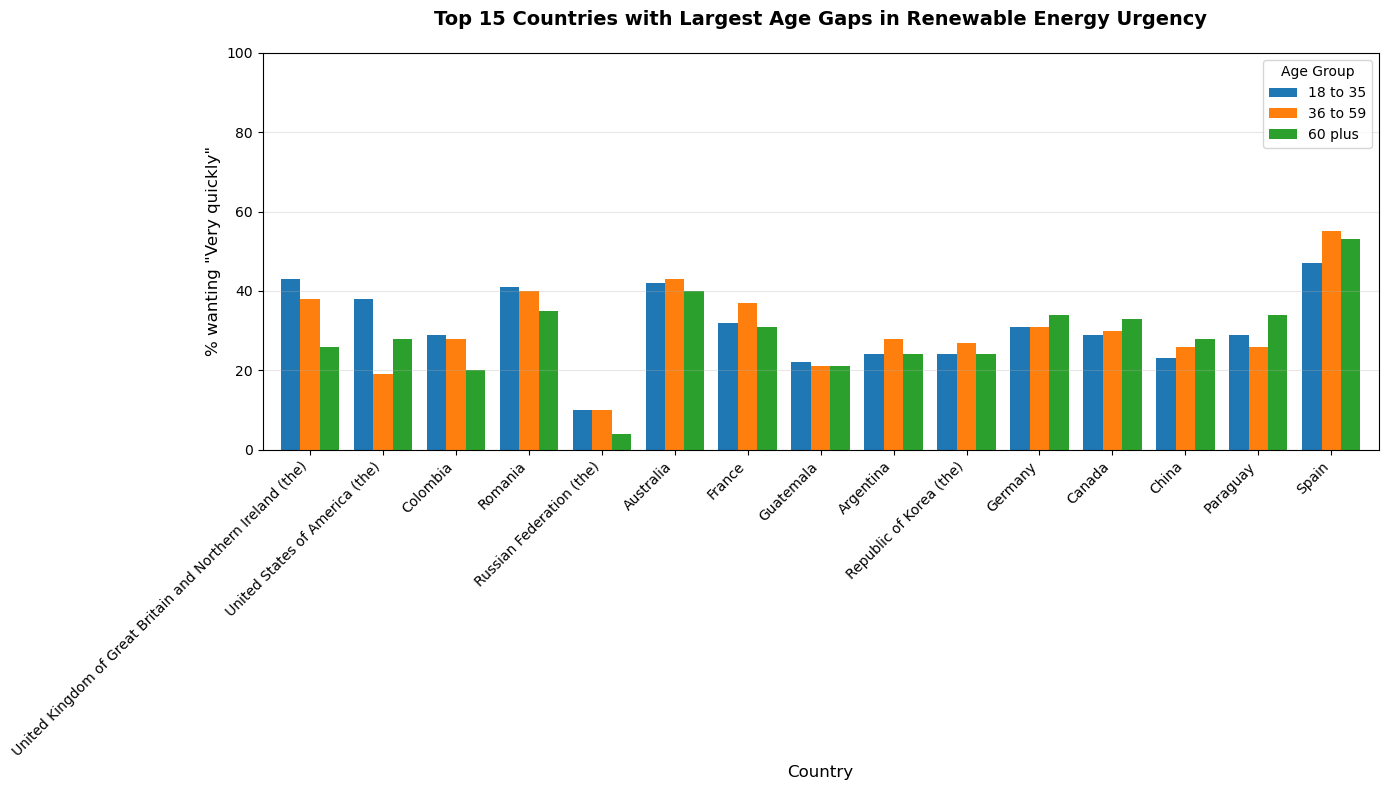

In [61]:
# 7. VISUALIZATION 2: GROUPED BAR CHART (Top 15 Countries)
# ============================================================================

top_15 = urgency_pivot_sorted.head(15).index
bar_data = urgency_pivot.loc[top_15, age_columns]

fig, ax = plt.subplots(figsize=(14, 8))
bar_data.plot(kind='bar', ax=ax, width=0.8)
plt.title('Top 15 Countries with Largest Age Gaps in Renewable Energy Urgency', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('% wanting "Very quickly"', fontsize=12)
plt.legend(title='Age Group', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('bar_chart_top15.png', dpi=300, bbox_inches='tight')
print("✓ Bar chart saved as 'bar_chart_top15.png'")
plt.show()

✓ Bar chart saved as 'bar_chart_bottom15.png'


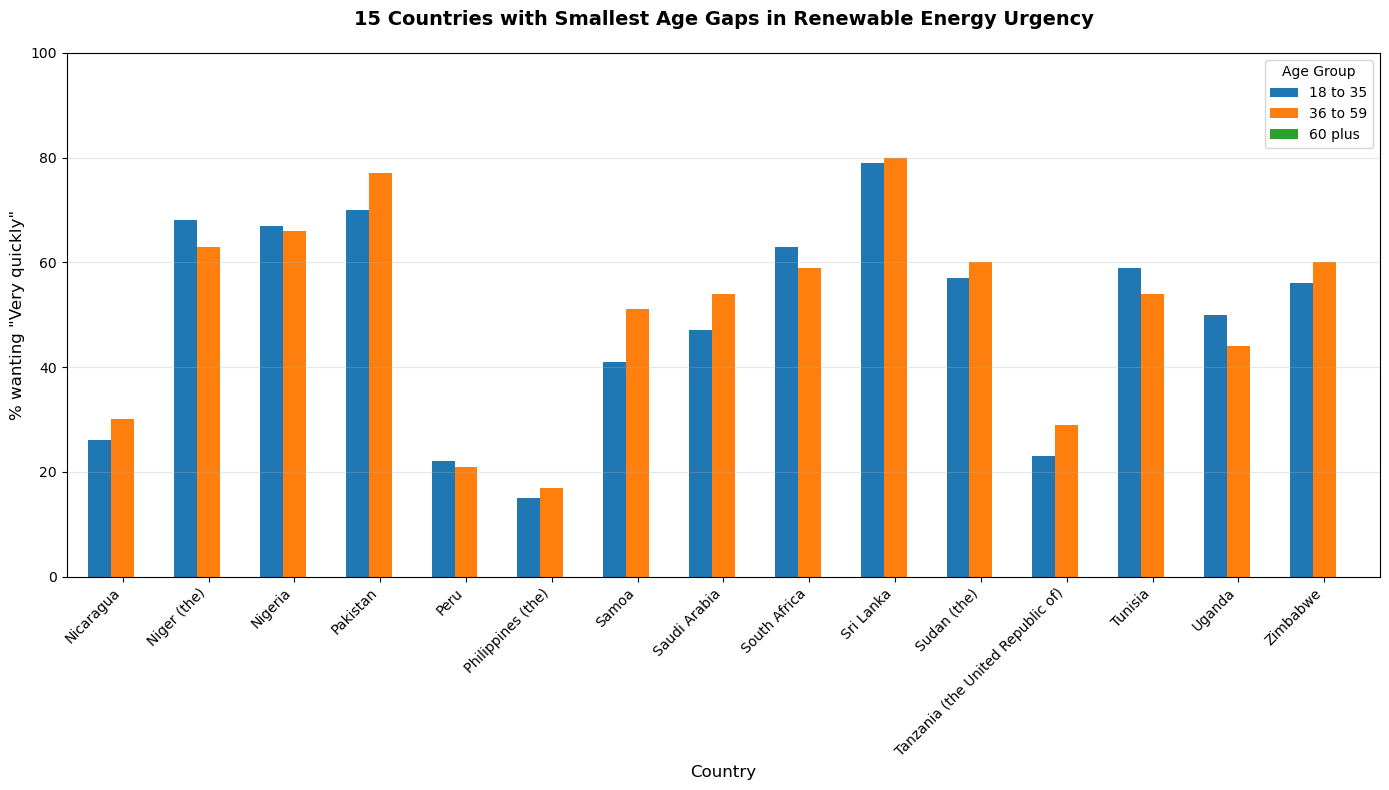

In [63]:
# 8. VISUALIZATION 3: GROUPED BAR CHART (Bottom 15 Countries)
# ============================================================================

bottom_15 = urgency_pivot_sorted.tail(15).index
bar_data_bottom = urgency_pivot.loc[bottom_15, age_columns]

fig, ax = plt.subplots(figsize=(14, 8))
bar_data_bottom.plot(kind='bar', ax=ax, width=0.8)
plt.title('15 Countries with Smallest Age Gaps in Renewable Energy Urgency', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('% wanting "Very quickly"', fontsize=12)
plt.legend(title='Age Group', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('bar_chart_bottom15.png', dpi=300, bbox_inches='tight')
print("✓ Bar chart saved as 'bar_chart_bottom15.png'")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11960\4002991925.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(box_data, labels=age_columns)


✓ Distribution plots saved as 'age_gap_distribution.png'


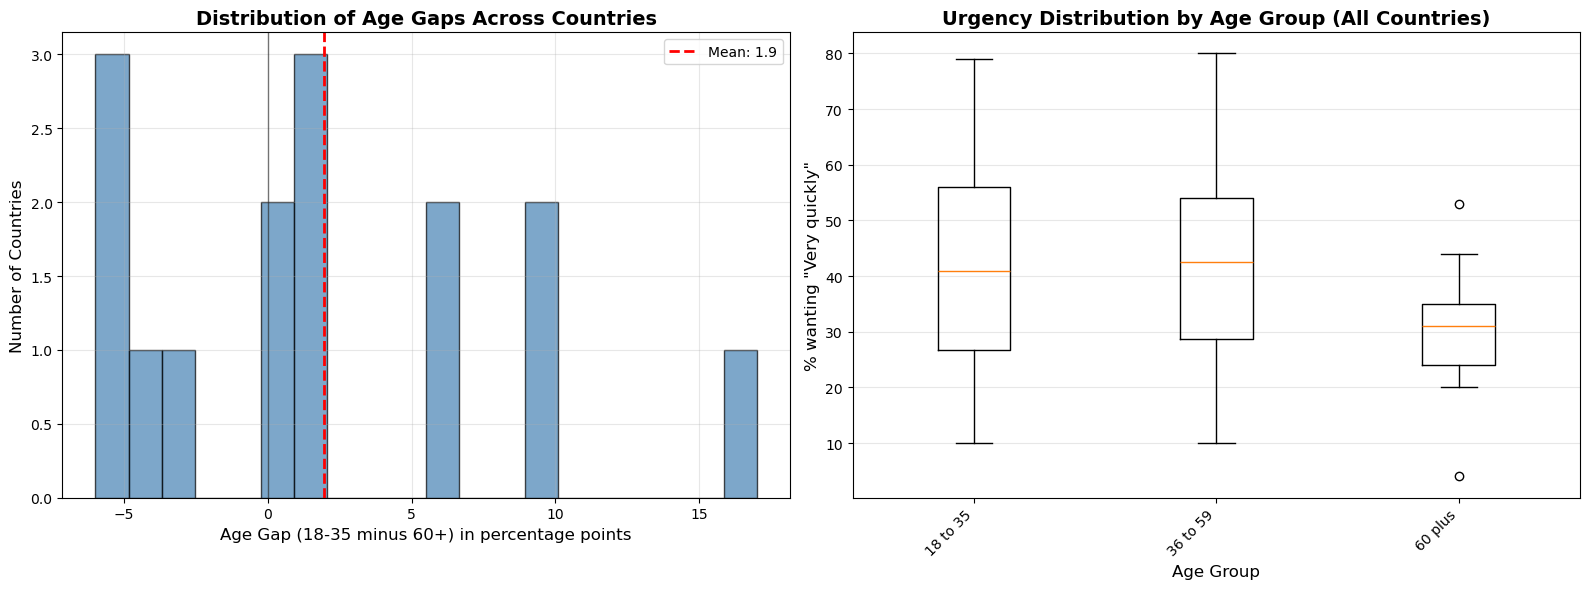

In [65]:
# 9. VISUALIZATION 4: Age Gap Distribution
# ============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of age gaps
ax1.hist(urgency_pivot['Age_Gap'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(urgency_pivot['Age_Gap'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {urgency_pivot["Age_Gap"].mean():.1f}')
ax1.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax1.set_xlabel('Age Gap (18-35 minus 60+) in percentage points', fontsize=12)
ax1.set_ylabel('Number of Countries', fontsize=12)
ax1.set_title('Distribution of Age Gaps Across Countries', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Box plot by age group
box_data = [urgency_pivot[col].dropna() for col in age_columns]
ax2.boxplot(box_data, labels=age_columns)
ax2.set_ylabel('% wanting "Very quickly"', fontsize=12)
ax2.set_xlabel('Age Group', fontsize=12)
ax2.set_title('Urgency Distribution by Age Group (All Countries)', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('age_gap_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Distribution plots saved as 'age_gap_distribution.png'")
plt.show()

In [67]:
# 10. ADDITIONAL ANALYSIS: Countries with consistent vs inconsistent patterns
# ============================================================================

print("\n" + "="*70)
print("PATTERN ANALYSIS")
print("="*70)

# Check if there's a consistent trend across age groups
urgency_pivot['Trend'] = 'Mixed'

# Countries where each younger group is more urgent than older
if all(col in age_columns for col in ['18 to 35', '36 to 59', '60 plus']):
    consistent_decline = (
        (urgency_pivot['18 to 35'] > urgency_pivot['36 to 59']) & 
        (urgency_pivot['36 to 59'] > urgency_pivot['60 plus'])
    )
    urgency_pivot.loc[consistent_decline, 'Trend'] = 'Consistent decline with age'
    
    # Opposite pattern
    consistent_increase = (
        (urgency_pivot['18 to 35'] < urgency_pivot['36 to 59']) & 
        (urgency_pivot['36 to 59'] < urgency_pivot['60 plus'])
    )
    urgency_pivot.loc[consistent_increase, 'Trend'] = 'Increases with age'

print("\nPattern distribution:")
print(urgency_pivot['Trend'].value_counts())


PATTERN ANALYSIS

Pattern distribution:
Trend
Mixed                          59
Consistent decline with age     3
Increases with age              2
Name: count, dtype: int64


In [69]:
# 11. EXPORT RESULTS FOR REPORT
# ============================================================================

# Save the full results to CSV
urgency_pivot_sorted.to_csv('age_gap_results.csv')
print("\n✓ Results exported to 'age_gap_results.csv'")

# Save summary statistics
summary_stats = {
    'Metric': ['Mean Age Gap', 'Median Age Gap', 'Std Deviation', 
               'Min Gap', 'Max Gap', 'Countries with Positive Gap', 
               'Countries with Negative Gap'],
    'Value': [
        f"{urgency_pivot['Age_Gap'].mean():.2f}",
        f"{urgency_pivot['Age_Gap'].median():.2f}",
        f"{urgency_pivot['Age_Gap'].std():.2f}",
        f"{urgency_pivot['Age_Gap'].min():.2f} ({urgency_pivot['Age_Gap'].idxmin()})",
        f"{urgency_pivot['Age_Gap'].max():.2f} ({urgency_pivot['Age_Gap'].idxmax()})",
        str(positive_gap),
        str(negative_gap)
    ]
}
summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('summary_statistics.csv', index=False)
print("✓ Summary statistics exported to 'summary_statistics.csv'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("  1. heatmap_age_urgency.png - Heatmap of top 30 countries")
print("  2. bar_chart_top15.png - Countries with largest age gaps")
print("  3. bar_chart_bottom15.png - Countries with smallest age gaps")
print("  4. age_gap_distribution.png - Distribution and box plots")
print("  5. age_gap_results.csv - Full numerical results")
print("  6. summary_statistics.csv - Key statistics for your report")
print("\nKey Finding:")
print(f"  → Average age gap across all countries: {urgency_pivot['Age_Gap'].mean():.1f} percentage points")
print(f"  → {positive_gap}/{len(urgency_pivot)} countries show young people MORE urgent")
print("\nUse these visualizations and statistics for your coursework report!")


✓ Results exported to 'age_gap_results.csv'
✓ Summary statistics exported to 'summary_statistics.csv'

ANALYSIS COMPLETE!

Generated files:
  1. heatmap_age_urgency.png - Heatmap of top 30 countries
  2. bar_chart_top15.png - Countries with largest age gaps
  3. bar_chart_bottom15.png - Countries with smallest age gaps
  4. age_gap_distribution.png - Distribution and box plots
  5. age_gap_results.csv - Full numerical results
  6. summary_statistics.csv - Key statistics for your report

Key Finding:
  → Average age gap across all countries: 1.9 percentage points
  → 8/64 countries show young people MORE urgent

Use these visualizations and statistics for your coursework report!
